In [1]:
import os

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

In [3]:
def search_images(term, max_images = 30):
    print(f"Searching for {term}")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [4]:
urls = search_images('bird photo', 1)
urls[0]

Searching for bird photo


'https://img.fotocommunity.com/birds-from-mauritius-a5541707-4f66-488b-9a8c-786a393a659a.jpg?height=1080'

In [5]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

Path('bird.jpg')

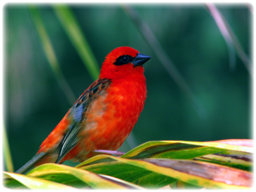

In [6]:
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

Searching for forest photo


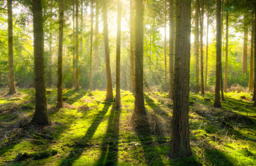

In [7]:
download_url(search_images("forest photo", 1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256, 256)

In [10]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

In [12]:
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok = True, parents = True)
    download_images(dest, urls=search_images(f'{o} photo'))
    # sleep(10)   # Pause between searches
    download_images(dest, urls=search_images(f'{o} sun photo'))
    # sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    # sleep(10)
    resize_images(path/o, max_size = 400, dest=path/o)


Searching for forest photo
Searching for forest sun photo
Searching for forest shade photo
Searching for bird photo
Searching for bird sun photo
Searching for bird shade photo


In [17]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

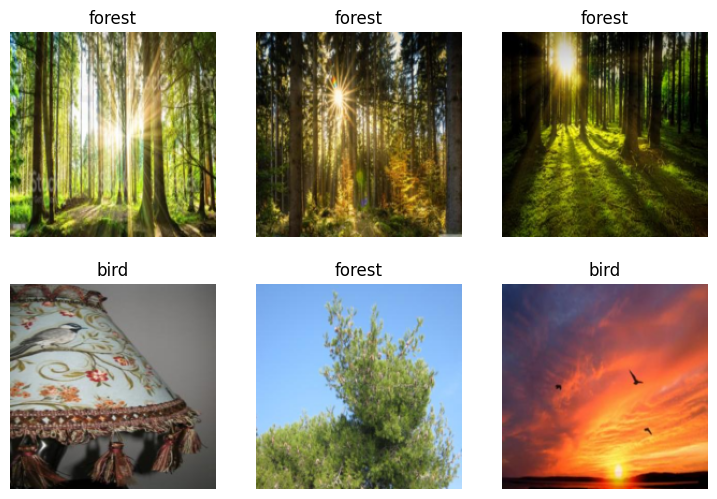

In [14]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [15]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/Users/smbp/Desktop/MyAI/FastAI/BirdAI/birdaivenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/smbp/Desktop/MyAI/FastAI/BirdAI/birdaivenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
is_bird,_,probs = learn.predict(PILImage.create('birdforest.jpeg'))
# is_bird,_,probs = learn.predict(PILImage.create('bird2.jpeg'))
print(f"This is a: {is_bird}")
print(f"Probability it's a {is_bird}: {probs[0]:.4f}")

This is a: bird
Probability it's a bird: 0.8118
